## Text Classification
### 20 class text-classification problem

### Importing Libraries

In [ ]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups    #Dataset 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
sns.set()

### Loading Dataset

In [ ]:
data = fetch_20newsgroups()
text_categories = data.target_names

In [ ]:
print(text_categories)
print(len(text_categories))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
20


In [ ]:
train_data = fetch_20newsgroups(subset='train',categories=text_categories)
test_data = fetch_20newsgroups(subset = 'test', categories=text_categories)

In [ ]:
print("We have {} unique classes".format(len(text_categories)))
print("We have {} training samples".format(len(train_data.data)))
print("We have {} test samples".format(len(test_data.data)))

We have 20 unique classes
We have 11314 training samples
We have 7532 test samples


### Data analysis

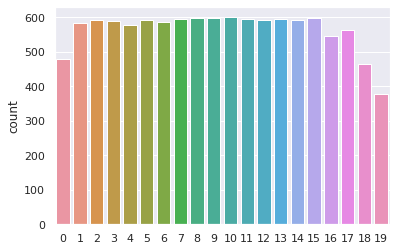

In [ ]:
sns.countplot(x=train_data.target)

We can see that we have a uniform dataset of about 550-600 occurences of training example belonging to each class. 

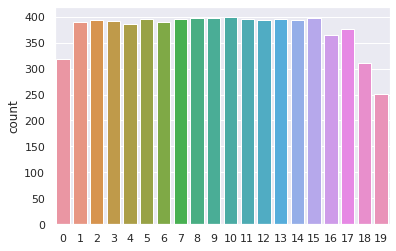

In [ ]:
sns.countplot(x=test_data.target)

### Let's visualize our training data

In [ ]:
print(train_data.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [ ]:
print("Above mail belongns to class {}".format(train_data.target_names[train_data.target[0]]))

Above mail belongns to class rec.autos


To apply a machine learning algorithm on text data, we need to first convert it into a feature matrix

scikit-learn provides utilities for the most common ways to extract numerical features
1. tokenizing strings to give a int id for each possible token
2. counting the occurence of each token

### Creating the model
We'll create the model by combining a vectorizer(feature extractor) with classifier.

**TfidfVectorizer:** TF-IDF stands for Term Frequency Inverse Document Frequency. A common algo to tranform text into a feature matrix.

$TFIDF = TF(t,d) * IDF(t)$</br>
$TF(t,d) =$ number of times term appear in doc d.</br>
$IDF(t) =$ inverse document frequency </br>
$IDF(t) = 1+log((1+n)/(1 + df(d,t)))$




**Multinumial Naive Bayes:** Feature vectors represent the frequencies with which certain events have been generated by a multinomial distribution. This is the event model typically used for document classification

In [ ]:
model = make_pipeline(TfidfVectorizer(analyzer='word',stop_words='english'), MultinomialNB())    # Pass in the parameter stop_words to remove all the stop words from the text data
model.fit(train_data.data,train_data.target)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Make predictions from the model

In [ ]:
predicted_categories = model.predict(test_data.data)

In [ ]:
print(test_data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


Let's have a look at one of the predictions

In [ ]:
print(test_data.data[0])

From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. GANDLER)
Subject: Need info on 88-89 Bonneville
Organization: University at Buffalo
Lines: 10
News-Software: VAX/VMS VNEWS 1.41
Nntp-Posting-Host: ubvmsd.cc.buffalo.edu


 I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.

			Neil Gandler



In [ ]:
print("Prediction: {}".format(text_categories[predicted_categories[0]]))

Prediction: rec.autos


visualiaztion of the confusion matrix in form a heatmap

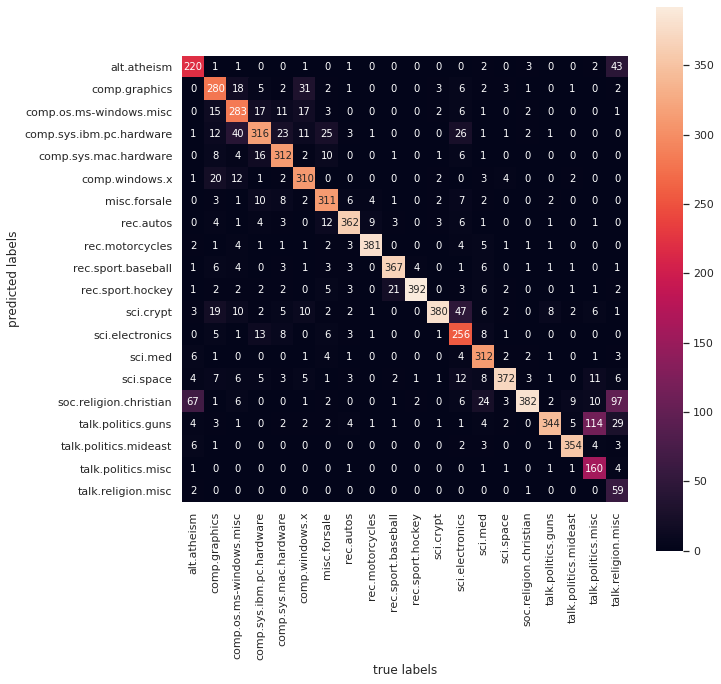

In [ ]:
plt.figure(figsize = (10,10))
mat = confusion_matrix(test_data.target,predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=train_data.target_names,yticklabels=train_data.target_names) # fmt allow to add string as label
plt.xlabel("true labels")
plt.ylabel("predicted labels")
plt.show()

In [ ]:
print("The accuracy is {}".format(accuracy_score(test_data.target, predicted_categories)))

The accuracy is 0.8169144981412639


We get a pretty good accuracy of about 81.7%, considering classification in 20 classes

In [ ]:
print(classification_report(test_data.target,predicted_categories))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       319
           1       0.78      0.72      0.75       389
           2       0.79      0.72      0.75       394
           3       0.68      0.81      0.74       392
           4       0.86      0.81      0.84       385
           5       0.87      0.78      0.82       395
           6       0.87      0.80      0.83       390
           7       0.88      0.91      0.90       396
           8       0.93      0.96      0.95       398
           9       0.91      0.92      0.92       397
          10       0.88      0.98      0.93       399
          11       0.75      0.96      0.84       396
          12       0.84      0.65      0.74       393
          13       0.92      0.79      0.85       396
          14       0.82      0.94      0.88       394
          15       0.62      0.96      0.76       398
          16       0.66      0.95      0.78       364
          17       0.95    

Creating a function to predict classes based on a sentence input

In [ ]:
def my_predictions(my_sentence, model):
    all_categories_names = np.array(data.target_names)
    prediction = model.predict([my_sentence])
    return all_categories_names[prediction]

In [ ]:
sentence = "National sport of india is hockey"
my_predictions(sentence,model)[0]

'rec.sport.hockey'